# Lab Segmentation 2

In [1]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

Initial Threshold: 1
Updated T: 64
Updated T: 109
Updated T: 116
Updated T: 117
Updated T: 118
Updated T: 118
Final Threshold: 118
Initial Threshold: 1
Updated T: 78
Updated T: 115
Updated T: 131
Updated T: 138
Updated T: 141
Updated T: 142
Updated T: 142
Final Threshold: 142
Initial Threshold: 1
Updated T: 82
Updated T: 124
Updated T: 140
Updated T: 142
Updated T: 142
Final Threshold: 142


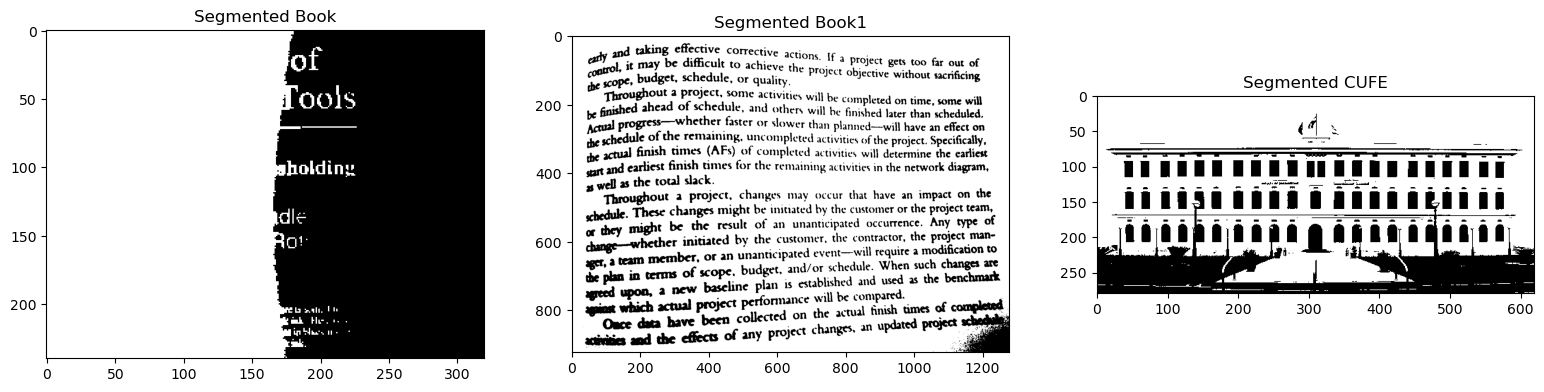

In [ ]:
import numpy as np
from skimage import io

def segmentation(image):
    image_uint8 = (255 * image).astype('uint8')

    counts = [0] * 256
    for row in image_uint8:
        for pixel in row:
            counts[pixel] += 1

    total_pixels = sum(counts)

    weighted_sum = np.sum(counts)
    T = round(weighted_sum / total_pixels)
    print("Initial Threshold:", T)

    while True:
        lower_pixels = sum(counts[i] for i in range(T))
        lower_mean = sum(i * counts[i] for i in range(T)) / lower_pixels if lower_pixels else 0

        upper_pixels = sum(counts[i] for i in range(T, 256))
        upper_mean = sum(i * counts[i] for i in range(T, 256)) / upper_pixels if upper_pixels else 0

        T_new = round((lower_mean + upper_mean) / 2)
        print("Updated T:", T_new)

        if T_new == T:
            break
        T = T_new

    print("Final Threshold:", T)
    return np.where(image_uint8 < T, 0, 255).astype('uint8')


img1 = io.imread("book.png", as_gray=True)
img2 = io.imread("book1.png", as_gray=True)
img3 = io.imread("cufe.png", as_gray=True)


seg1 = segmentation(img1)
seg2 = segmentation(img2)
seg3 = segmentation(img3)


show_images(
    [seg1, seg2, seg3],
    ["Segmented Book", "Segmented Book1", "Segmented CUFE"]
)



Initial Threshold: 1
Updated T: 64
Updated T: 109
Updated T: 116
Updated T: 117
Updated T: 118
Updated T: 118
Final Threshold: 118
Initial Threshold: 1
Updated T: 115
Updated T: 115
Final Threshold: 115
Initial Threshold: 1
Updated T: 16
Updated T: 52
Updated T: 65
Updated T: 69
Updated T: 70
Updated T: 70
Final Threshold: 70
Initial Threshold: 1
Updated T: 112
Updated T: 112
Final Threshold: 112
Initial Threshold: 1
Updated T: 13
Updated T: 43
Updated T: 53
Updated T: 57
Updated T: 59
Updated T: 59
Final Threshold: 59


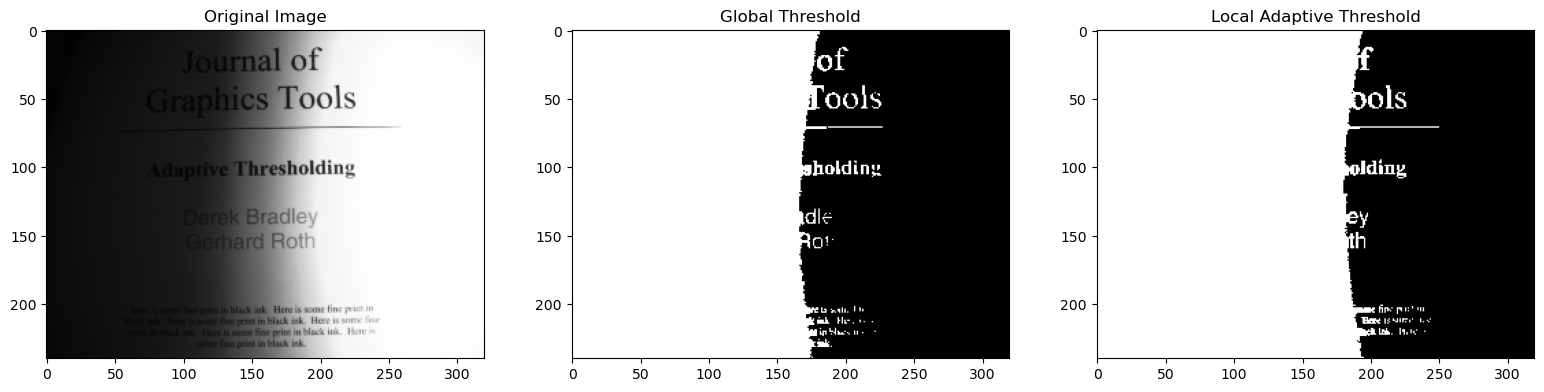

In [ ]:
import numpy as np
from skimage import io

img = io.imread("book.png", as_gray=True)

global_thresh_img = segmentation(img)

h, w = img.shape
h2, w2 = h // 2, w // 2

q1 = img[:h2, :w2]      # top-left
q2 = img[:h2, w2:]      # top-right
q3 = img[h2:, :w2]      # bottom-left
q4 = img[h2:, w2:]      # bottom-right

q1_t = segmentation(q1)
q2_t = segmentation(q2)
q3_t = segmentation(q3)
q4_t = segmentation(q4)

top = np.hstack((q1_t, q2_t))
bottom = np.hstack((q3_t, q4_t))
local_thresh_img = np.vstack((top, bottom))

show_images(
    [img, global_thresh_img, local_thresh_img],
    ["Original Image", "Global Threshold", "Local Adaptive Threshold"]
)
